# eigenvector example

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


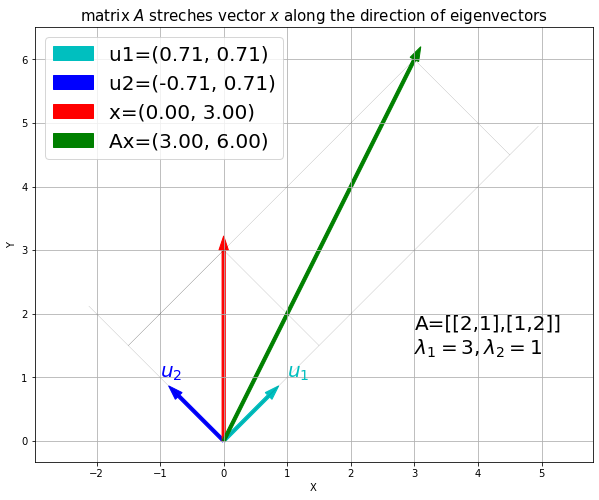

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Eigenvectors and Matrix
x = np.array([0, 3])
A = np.array([[2, 1], [1, 2]])
eigenvalues, eigenvectors = np.linalg.eig(A)
u1 = eigenvectors[:,0]
u2 = eigenvectors[:,1]

# Create a figure
fig, ax = plt.subplots(figsize=(10, 8))

# Format vectors to display only two decimal places
formatted_u1 = [f'{u1[0]:.2f}', f'{u1[1]:.2f}']
formatted_u2 = [f'{u2[0]:.2f}', f'{u2[1]:.2f}']
formatted_x = [f'{x[0]:.2f}', f'{x[1]:.2f}']
formatted_Ax = [f'{(A @ x)[0]:.2f}', f'{(A @ x)[1]:.2f}']

# Create arrows to represent vectors with formatted labels
u1_arrow = patches.FancyArrow(0, 0, u1[0], u1[1], width=0.05, color='c', label=f'u1=({formatted_u1[0]}, {formatted_u1[1]})')
u2_arrow = patches.FancyArrow(0, 0, u2[0], u2[1], width=0.05, color='b', label=f'u2=({formatted_u2[0]}, {formatted_u2[1]})')
x_arrow = patches.FancyArrow(0, 0, x[0], x[1], width=0.05, color='r', label=f'x=({formatted_x[0]}, {formatted_x[1]})')
Ax_arrow = patches.FancyArrow(0, 0, (A @ x)[0], (A @ x)[1], width=0.05, color='g', label=f'Ax=({formatted_Ax[0]}, {formatted_Ax[1]})')

# Add arrows to the plot
ax.add_patch(u1_arrow)
ax.add_patch(u2_arrow)
ax.add_patch(x_arrow)
ax.add_patch(Ax_arrow)

# Draw long lines along u1 and u2
ax.plot([0, u1[0]*7], [0, u1[1]*7], color='k', linewidth=0.1)
ax.plot([0, u2[0]*3], [0, u2[1]*3], color='k', linewidth=0.1)

# visualize A@x = lambda1*c1*u1 + lambda2*c2*u2 
d1 = u2.T @ x
d2 = u1.T @ x
ax.plot([x[0], x[0]-d1*u2[0]], [x[1], x[1]- d1*u2[1]], color='k', linewidth=0.1)
ax.plot([x[0], x[0]-d2*u1[0]], [x[1], x[1]- d2*u1[1]], color='k', linewidth=0.1)

d1 = u2.T @ (A@x)
d2 = u1.T @ (A@x)
ax.plot([(A@x)[0], (A@x)[0]-d1*u2[0]], [(A@x)[1], (A@x)[1]- d1*u2[1]], color='k', linewidth=0.1)
ax.plot([(A@x)[0], (A@x)[0]-d2*u1[0]], [(A@x)[1], (A@x)[1]- d2*u1[1]], color='k', linewidth=0.1)

# Set axis limits and ensure axis is equal
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.axis('equal')  

# Add labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(prop={'size': 20})
ax.grid()
ax.set_title('matrix $A$ streches vector $x$ along the direction of eigenvectors',size=15)


matrix_text = ("A=[[2,1],[1,2]]\n"
                "$\lambda_1=3,\lambda_2=1$\n"
                )

ax.text(3, 1, matrix_text, fontsize=20, color='k')
ax.text(1, 1, "$u_1$", fontsize=20, color='c')
ax.text(-1, 1, "$u_2$", fontsize=20, color='b')

# Save the figure as an EPS file
plt.savefig('eigenvector_example.eps', format='eps')


# Show the plot (optional)
plt.show()
